## Diabetes Model Prediction

Dataset Source- https://www.kaggle.com/datasets/mathchi/diabetes-data-set

In [1]:
# supress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing libraries
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
df = pd.read_csv('data/diabetes.csv')

#show top 5 records
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

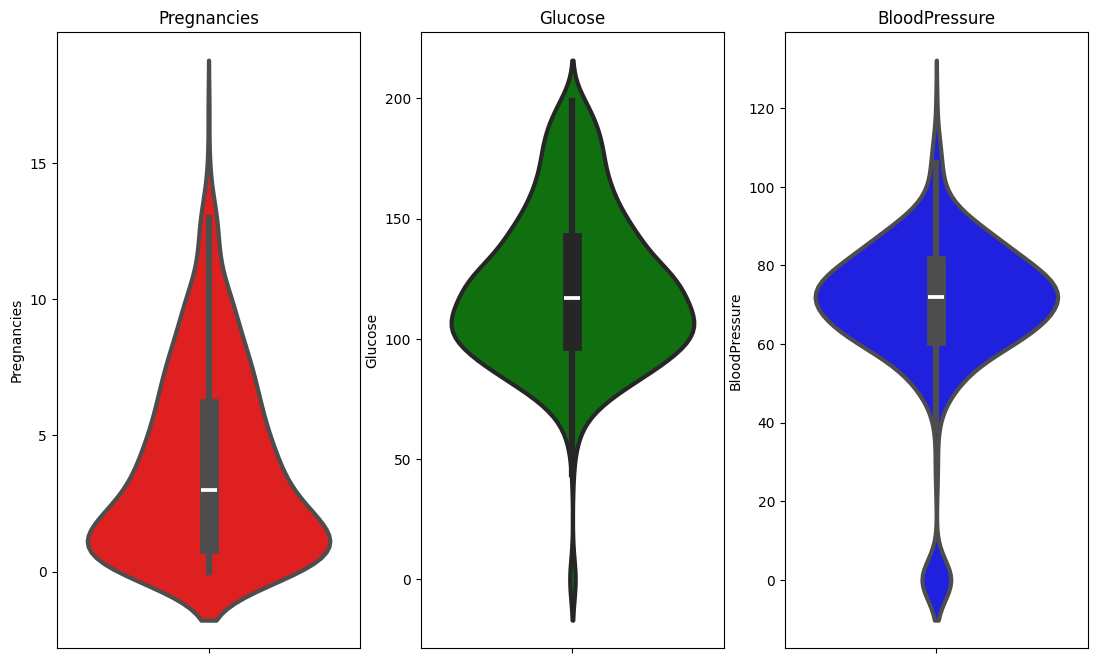

In [11]:
plt.figure(figsize=(18,8))

plt.subplot(1, 4, 1)
plt.title('Pregnancies')
sns.violinplot(y='Pregnancies',data=df,color='red',linewidth=3)

plt.subplot(1, 4, 2)
plt.title('Glucose')
sns.violinplot(y='Glucose',data=df,color='green',linewidth=3)

plt.subplot(1, 4, 3)
plt.title('BloodPressure')
sns.violinplot(y='BloodPressure',data=df,color='blue',linewidth=3)
plt.show()

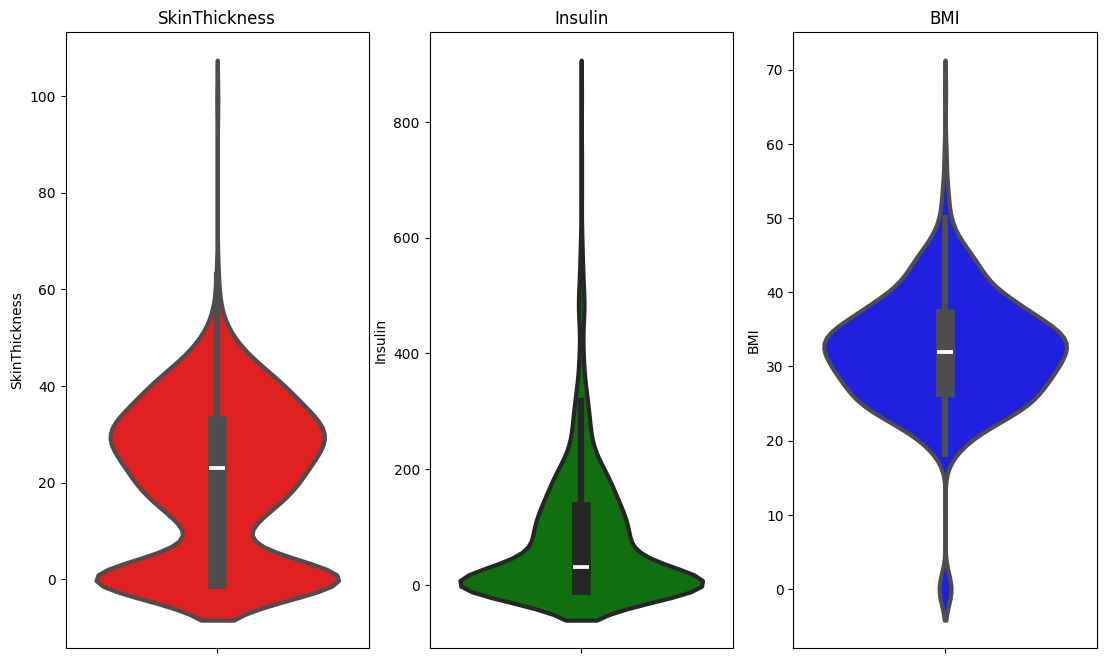

In [12]:
plt.figure(figsize=(18,8))

plt.subplot(1, 4, 1)
plt.title('SkinThickness')
sns.violinplot(y='SkinThickness',data=df,color='red',linewidth=3)

plt.subplot(1, 4, 2)
plt.title('Insulin')
sns.violinplot(y='Insulin',data=df,color='green',linewidth=3)

plt.subplot(1, 4, 3)
plt.title('BMI')
sns.violinplot(y='BMI',data=df,color='blue',linewidth=3)
plt.show()

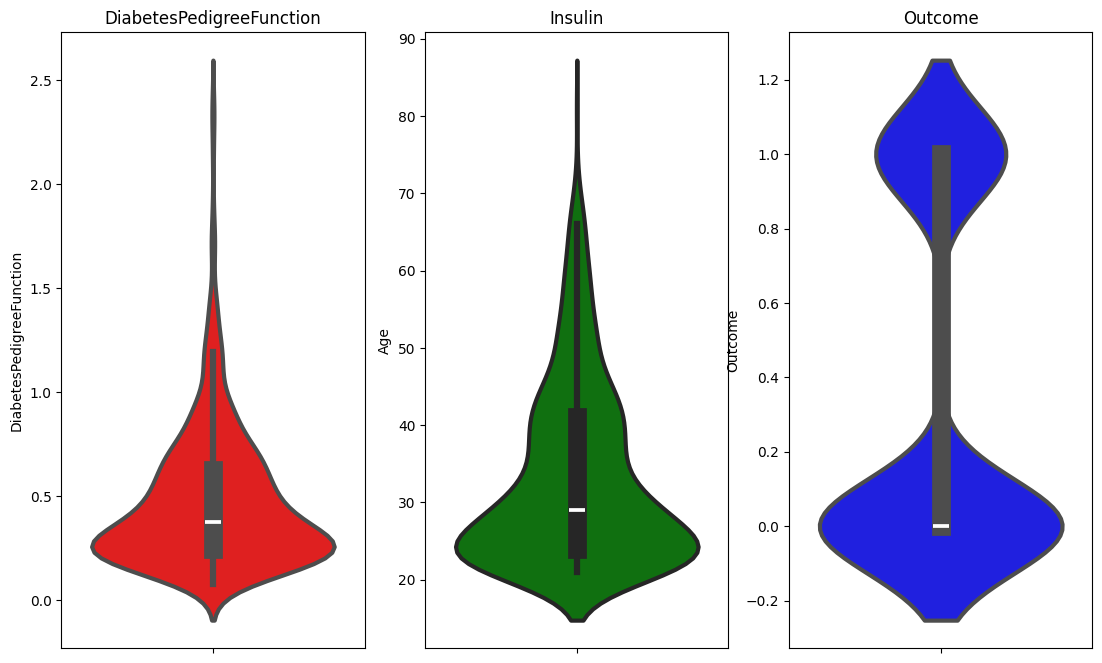

In [13]:
plt.figure(figsize=(18,8))

plt.subplot(1, 4, 1)
plt.title('DiabetesPedigreeFunction')
sns.violinplot(y='DiabetesPedigreeFunction',data=df,color='red',linewidth=3)

plt.subplot(1, 4, 2)
plt.title('Insulin')
sns.violinplot(y='Age',data=df,color='green',linewidth=3)

plt.subplot(1, 4, 3)
plt.title('Outcome')
sns.violinplot(y='Outcome',data=df,color='blue',linewidth=3)
plt.show()

### CHECKING OUTLIERS

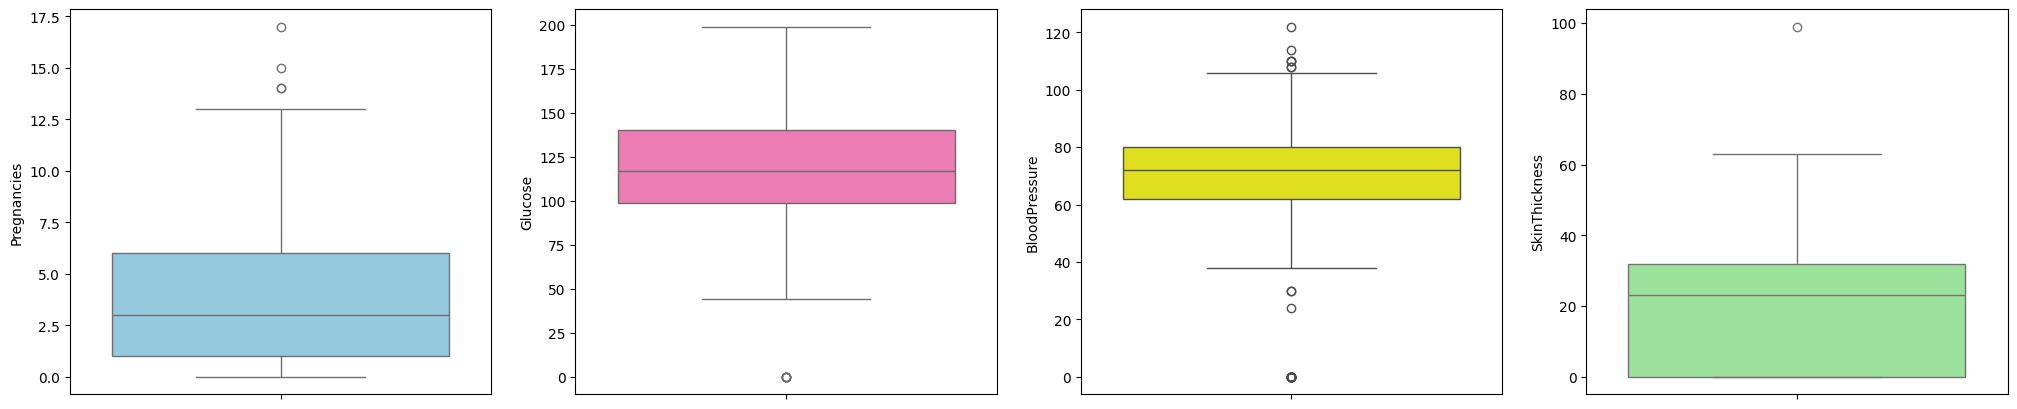

In [31]:
plt.subplots(1,4,figsize=(25,5))
plt.subplot(141)
sns.boxplot(df['Pregnancies'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['Glucose'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['BloodPressure'],color='yellow')
plt.subplot(144)
sns.boxplot(df['SkinThickness'],color='lightgreen')

plt.show()

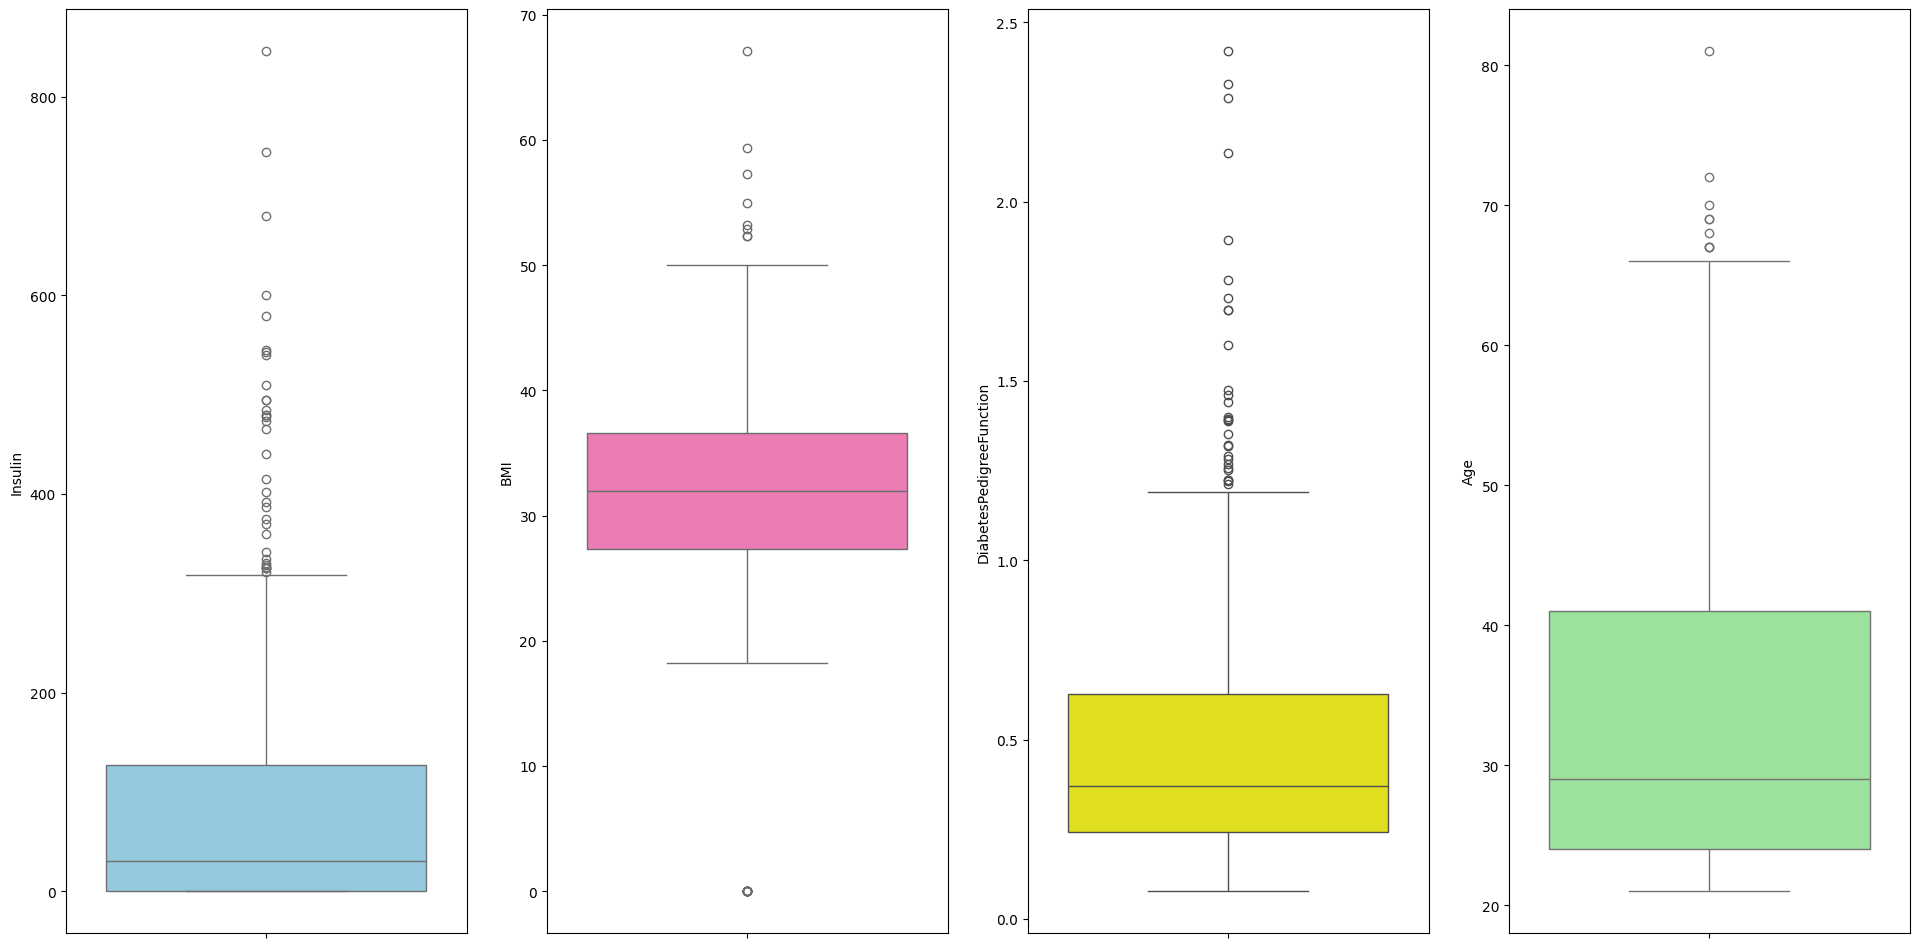

In [32]:
plt.rcParams['figure.figsize'] = (30, 12)
# plt.subplots(1,5,figsize=(25,6))
plt.subplot(151)
sns.boxplot(df['Insulin'],color='skyblue')
plt.subplot(152)
sns.boxplot(df['BMI'],color='hotpink')
plt.subplot(153)
sns.boxplot(df['DiabetesPedigreeFunction'],color='yellow')
plt.subplot(154)
sns.boxplot(df['Age'],color='lightgreen')

plt.show()

<Axes: xlabel='Outcome', ylabel='Count'>

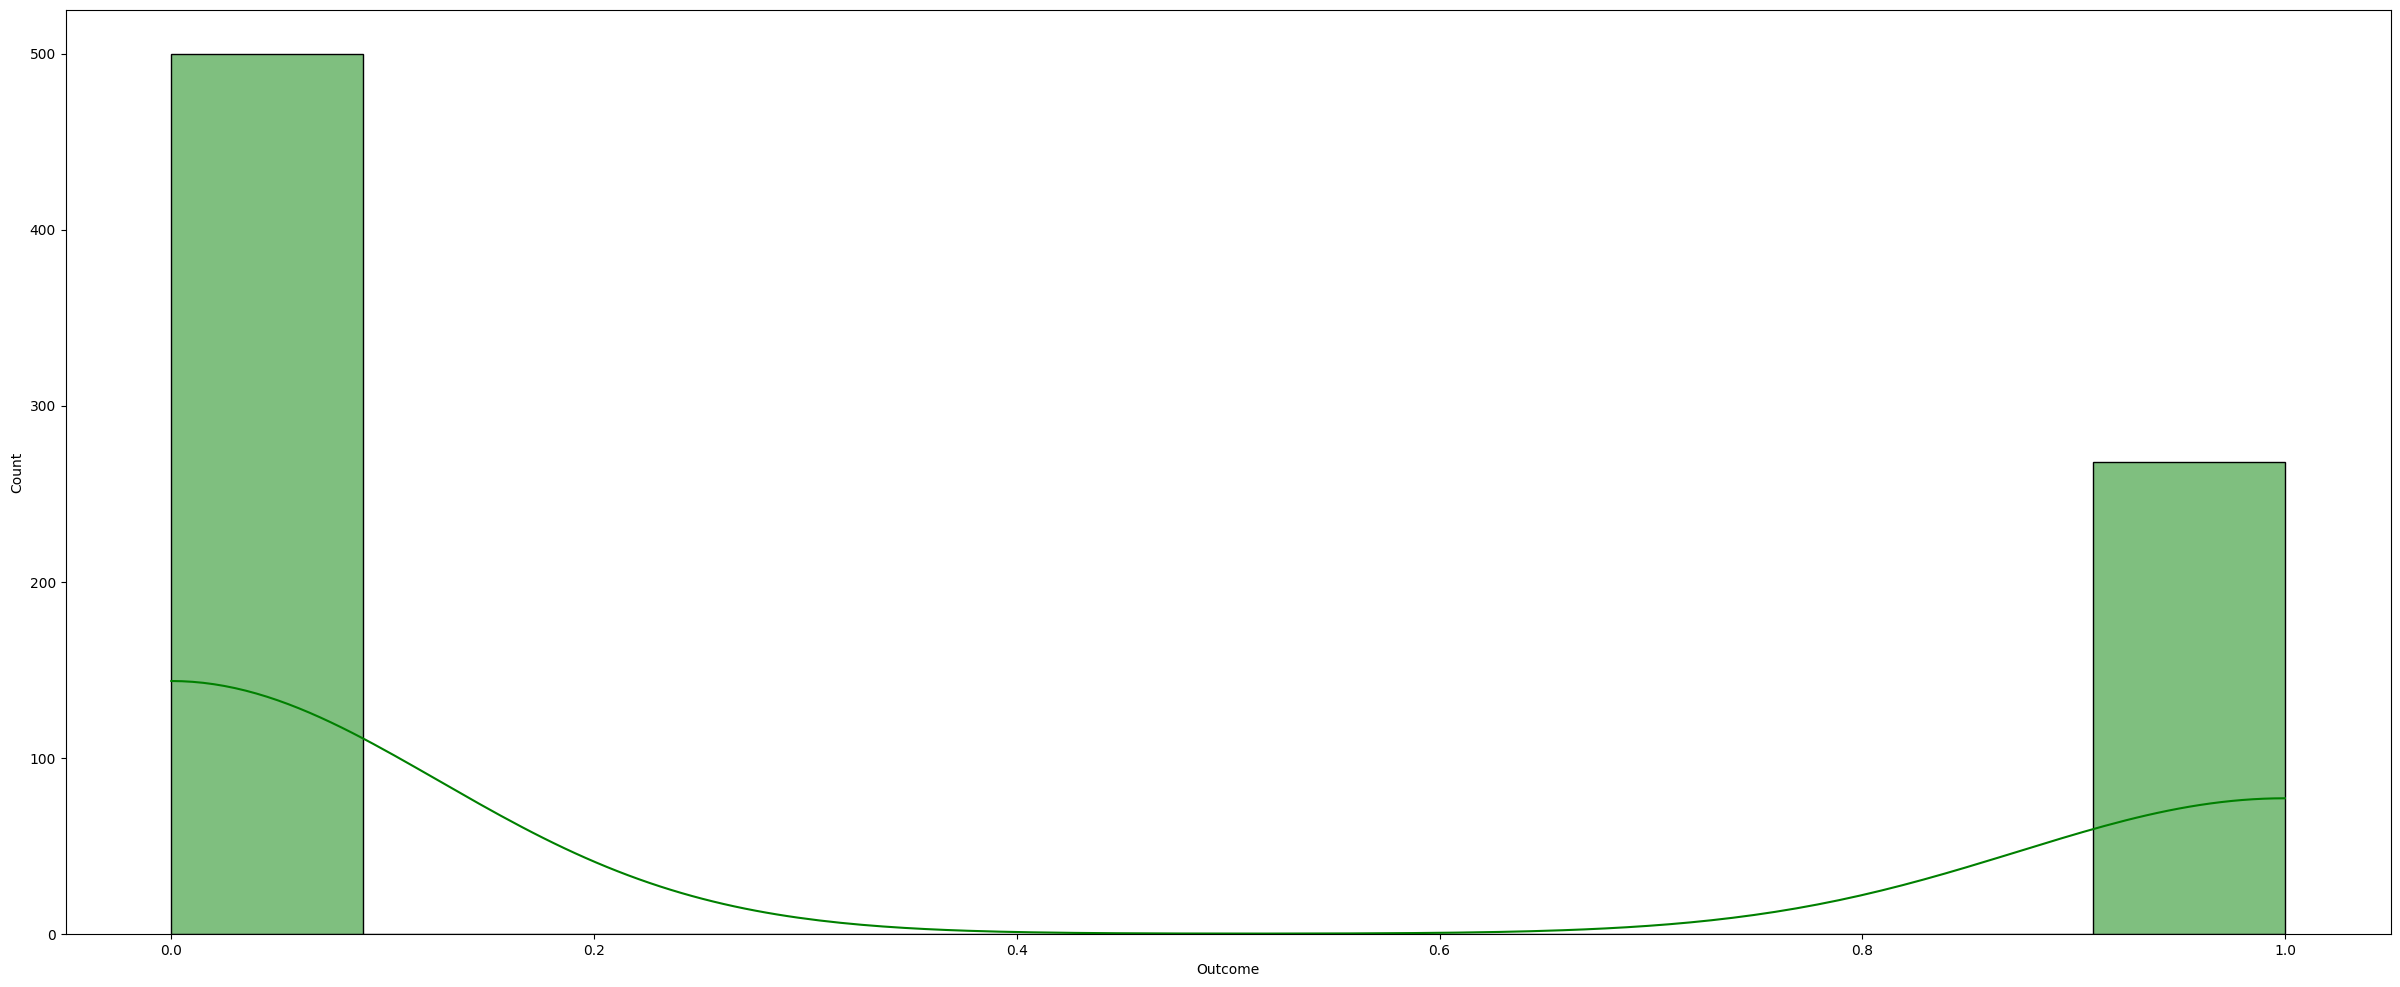

In [42]:
sns.histplot(data=df, x='Outcome', kde=True, color='g')